# <center> Обучение с учителем
## <center> Предсказать совершение покупки пользователем во время его сессии на сайте некоторого интернет-магазина.

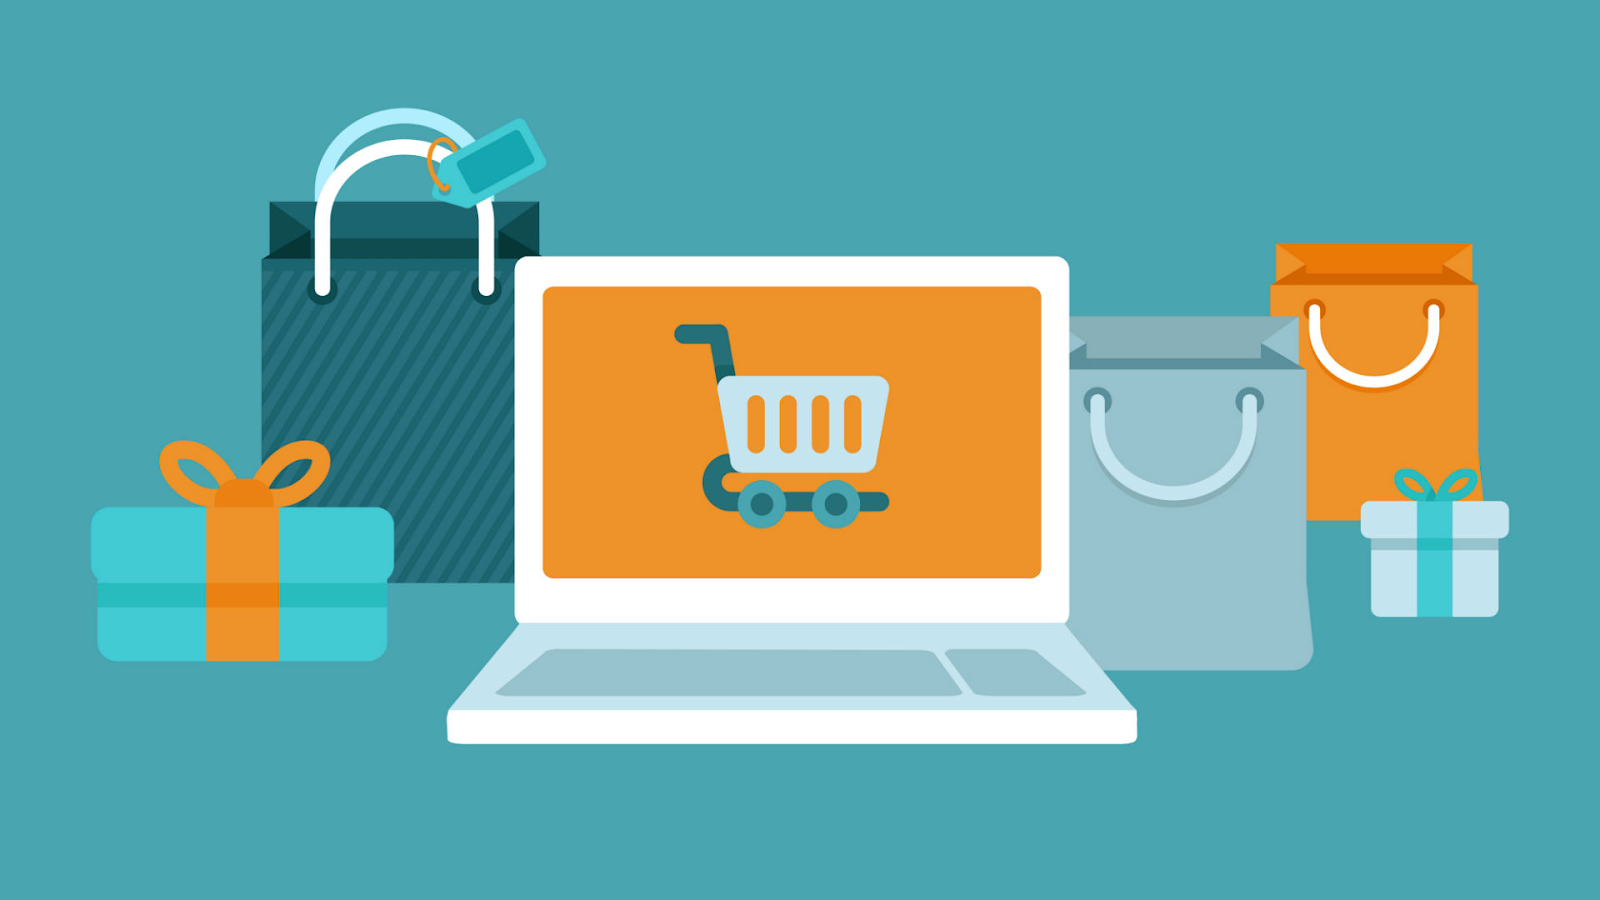

Импортируем библиотеки

In [183]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import metrics #метрики
from sklearn import model_selection #методы разделения и валидации
from sklearn import ensemble #ансамбли

plt.style.use('seaborn-v0_8') #стиль отрисовки seaborn
%matplotlib inline

### Анализ требований

> Цель: Построить модель, которая предсказывает вероятность совершения покупки пользователем во время сессии на сайте интернет-магазина.


Знакомство с данными

Информация о наборе данных:
Набор данных состоит из векторов признаков, относящихся к 12 330 сеансам.
Набор данных был сформирован таким образом, чтобы каждый сеанс
принадлежал отдельному пользователю в течение 1 года, чтобы избежать
привязки к конкретной кампании, особому дню, профилю пользователя
или периоду.

In [184]:
shoppers_data = pd.read_csv('online_shoppers_intention.csv')
shoppers_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [185]:
shoppers_data.shape

(12330, 18)

In [186]:
shoppers_data.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Пропуски отсутствуют

### Исследование данных

shoppers_data.head()

In [187]:
shoppers_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


Закодируем категориальные признаки с помощью One-Hot Encoding

In [188]:
dummy_shoppers = pd.get_dummies(shoppers_data)
dummy_shoppers.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True


Итак, нам необходимо предсказать целевую переменную Revenue — признак покупки. Целевой признак является бинарным категориальным, то есть мы решаем задачу бинарной классификации. В первую очередь посмотрим на соотношение классов в данных:

Sessions without purchase : 84.53%
Sessions with purchase: 15.47%


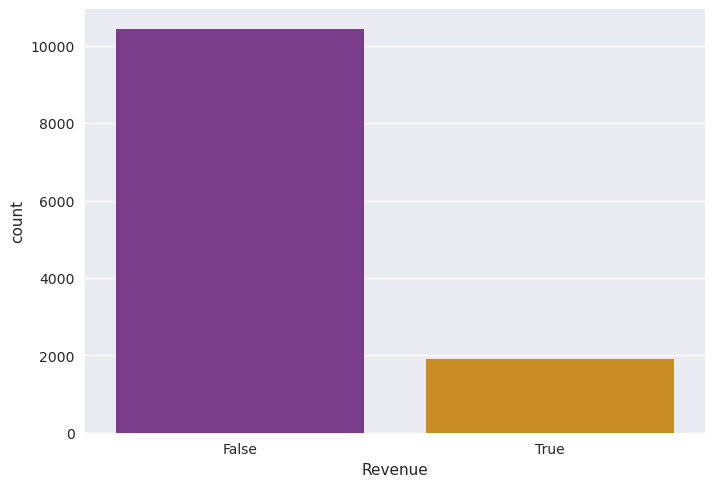

In [189]:
sns.countplot(x='Revenue', data=dummy_shoppers, palette='CMRmap', hue='Revenue', legend=False)
class_percent = dummy_shoppers['Revenue'].value_counts(normalize=True) * 100
print('Sessions without purchase : {:.2f}%'.format(class_percent.iloc[0]))
print('Sessions with purchase: {:.2f}%'.format(class_percent.iloc[1]))

По графику видно, что выборка не сбалансирована, так как соотношение классов - 85/15

Из 12 330 сессий покупкой товара завершаются лишь 15.47 %. Мы знаем, что такое соотношение классов заставляет нас смотреть на метрики для каждого из классов отдельно. Используем метрику F1-Score.

### Подготовка данных

In [190]:
dummy_shoppers[dummy_shoppers.duplicated()].sum()

Administrative                     0.0
Administrative_Duration            0.0
Informational                      0.0
Informational_Duration             0.0
ProductRelated                   132.0
ProductRelated_Duration            0.0
BounceRates                       25.0
ExitRates                         25.0
PageValues                         0.0
SpecialDay                         1.4
OperatingSystems                 263.0
Browser                          286.0
Region                           321.0
TrafficType                      456.0
Weekend                            9.0
Revenue                            0.0
Month_Aug                          0.0
Month_Dec                         21.0
Month_Feb                          3.0
Month_Jul                          0.0
Month_June                         3.0
Month_Mar                         47.0
Month_May                         35.0
Month_Nov                         16.0
Month_Oct                          0.0
Month_Sep                

In [191]:
#cleaned_data = dummy_shoppers.drop_duplicates()

In [192]:
X, y = dummy_shoppers.drop('Revenue', axis=1), dummy_shoppers['Revenue']

Контроль качества наших моделей будем производить следующим образом:

* Разделим выборку на тренировочную и тестовую.
* Будем проводить кросс-валидацию на тренировочной выборке (то есть будем делить её на тренировочные и валидационные фолды и считать среднее значение метрики по фолдам).

Итого мы будем использовать три показателя:

* значение метрики на тренировочных и валидационных фолдах кросс-валидации (по ним мы будем отслеживать переобучение модели и подбирать внешние параметры);
* значение метрики на отложенной тестовой выборке (оно будет нашим контрольным показателем).

In [193]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, 
                                                   y, 
                                                   test_size=0.2, 
                                                   random_state=42, 
                                                   stratify=y)

print("Распределение в исходных данных:")
print(y.value_counts(normalize=True))

print("\nРаспределение в тренировочной выборке:")
print(y_train.value_counts(normalize=True))

print("\nРаспределение в тестовой выборке:")
print(y_test.value_counts(normalize=True))

Распределение в исходных данных:
Revenue
False    0.845255
True     0.154745
Name: proportion, dtype: float64

Распределение в тренировочной выборке:
Revenue
False    0.845296
True     0.154704
Name: proportion, dtype: float64

Распределение в тестовой выборке:
Revenue
False    0.845093
True     0.154907
Name: proportion, dtype: float64


In [194]:
y_train.shape

(9864,)

In [195]:
y_test.shape

(2466,)

### Моделирование

Будем использовать случайный лес

In [196]:
def plot_learning_curve(model, X, y, cv, scoring="f1", ax=None, title=""):
    # Вычисляем координаты для построения кривой обучения
    train_sizes, train_scores, valid_scores = model_selection.learning_curve(
        estimator=model,  # модель
        X=X,  # матрица наблюдений X
        y=y,  # вектор ответов y
        cv=cv,  # кросс-валидатор
        scoring=scoring,  # метрика
    )
    # Вычисляем среднее значение по фолдам для каждого набора данных
    train_scores_mean = np.mean(train_scores, axis=1)
    valid_scores_mean = np.mean(valid_scores, axis=1)
    # Если координатной плоскости не было передано, создаём новую
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 4))  # фигура + координатная плоскость
    # Строим кривую обучения по метрикам на тренировочных фолдах
    ax.plot(train_sizes, train_scores_mean, label="Train")
    # Строим кривую обучения по метрикам на валидационных фолдах
    ax.plot(train_sizes, valid_scores_mean, label="Valid")
    # Даём название графику и подписи осям
    ax.set_title("Learning curve: {}".format(title))
    ax.set_xlabel("Train data size")
    ax.set_ylabel("Score")
    # Устанавливаем отметки по оси абсцисс
    ax.xaxis.set_ticks(train_sizes)
    # Устанавливаем диапазон оси ординат
    ax.set_ylim(0, 1)
    # Отображаем легенду
    ax.legend()

In [197]:
forest = ensemble.RandomForestClassifier(random_state=42)


kf = model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_metrics = model_selection.cross_validate(
    estimator=forest,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='f1',
    return_train_score=True,
)

print('Train k-fold mean F1-Score: {:.2f}'.format(np.mean(cv_metrics['train_score'])))
print('Valid k-fold mean F1-Score: {:.2f}'.format(np.mean(cv_metrics['test_score'])))
    


Train k-fold mean F1-Score: 1.00
Valid k-fold mean F1-Score: 0.64


In [198]:
models = [
    ensemble.RandomForestClassifier(n_estimators=200,
                                         max_depth=5, 
                                         min_samples_leaf=5, 
                                         random_state=42),
    ensemble.RandomForestClassifier(n_estimators=200,
                                         max_depth=7, 
                                         min_samples_leaf=5, 
                                         random_state=42),
    ensemble.RandomForestClassifier(n_estimators=200,
                                         max_depth=12, 
                                         min_samples_leaf=5, 
                                         random_state=42)
]

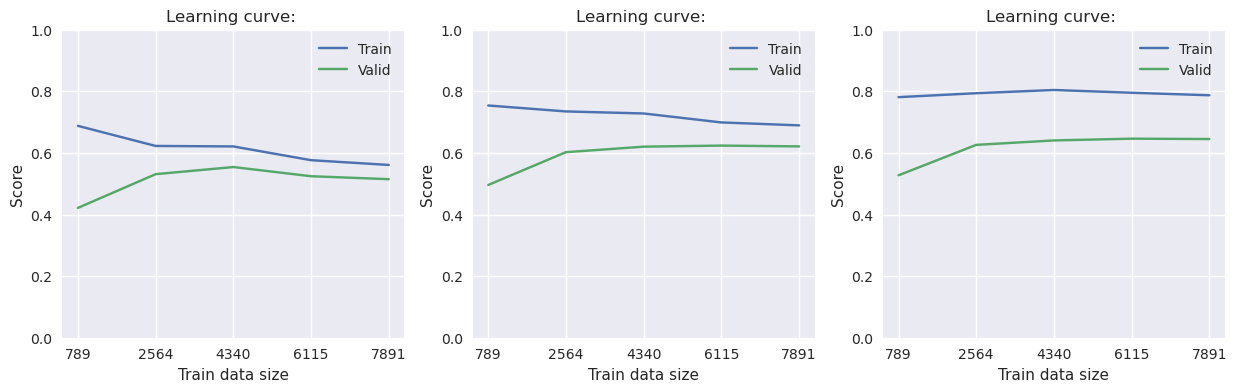

In [199]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, model in enumerate(models): #i-текущий индекс, model - текущая модель
    plot_learning_curve(
        model, 
        X_train, 
        y_train, 
        kf, 
        ax=axes[i], 
)

Оптимальная глубина деревьев в лесу является оптимальной, т.к разрыв нее большой

In [200]:
forest = ensemble.RandomForestClassifier(n_estimators=200,
                                         max_depth=7, 
                                         min_samples_leaf=5, 
                                         random_state=42)


kf = model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_metrics = model_selection.cross_validate(
    estimator=forest,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='f1',
    return_train_score=True,
)

print('Train k-fold mean F1-Score: {:.2f}'.format(np.mean(cv_metrics['train_score'])))
print('Valid k-fold mean F1-Score: {:.2f}'.format(np.mean(cv_metrics['test_score'])))

Train k-fold mean F1-Score: 0.69
Valid k-fold mean F1-Score: 0.62


In [201]:
forest = ensemble.RandomForestClassifier(n_estimators=200,
                                         max_depth=7, 
                                         min_samples_leaf=5, 
                                         random_state=42)
forest.fit(X_train, y_train)

y_train_pred = forest.predict(X_train)

#Выводим значения метрик
print(metrics.classification_report(y_train, y_train_pred)) 

              precision    recall  f1-score   support

       False       0.93      0.98      0.95      8338
        True       0.86      0.57      0.68      1526

    accuracy                           0.92      9864
   macro avg       0.89      0.78      0.82      9864
weighted avg       0.92      0.92      0.91      9864



Модель хорошо определяет всех посетителей, которые завершат сессию без покупки, а вот качество распознавания пользователей, совершивших покупку, значительно ниже.

Best threshold = 0.34, F1-Score = 0.69


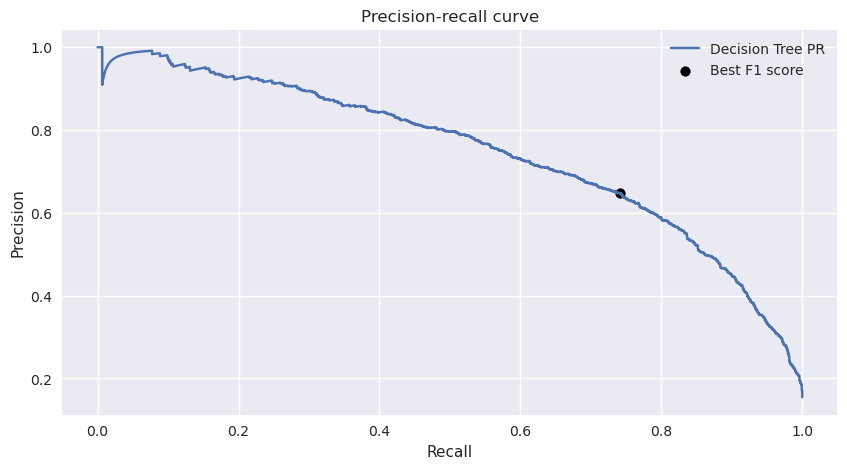

In [202]:
forest = ensemble.RandomForestClassifier(n_estimators=200,
                                         max_depth=7, 
                                         min_samples_leaf=5, 
                                         random_state=42)


kf = model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

y_cv_proba_pred = model_selection.cross_val_predict(forest, X_train, y_train, cv=kf,method='predict_proba')

y_cv_proba_pred = y_cv_proba_pred[:, 1]
precision, recall, thresholds = metrics.precision_recall_curve(y_train, y_cv_proba_pred)

f1_scores = (2 * precision * recall) / (precision + recall)
#Определяем индекс максимума
idx = np.argmax(f1_scores)
print('Best threshold = {:.2f}, F1-Score = {:.2f}'.format(thresholds[idx], f1_scores[idx]))

#Строим PR-кривую
fig, ax = plt.subplots(figsize=(10, 5)) #фигура + координатная плоскость
#Строим линейный график зависимости precision от recall
ax.plot(recall, precision, label='Decision Tree PR')
#Отмечаем точку максимума F1
ax.scatter(recall[idx], precision[idx], marker='o', color='black', label='Best F1 score')
#Даем графику название и подписи осям
ax.set_title('Precision-recall curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
#Отображаем легенду
ax.legend();

In [204]:
threshold_opt = 0.33
forest = ensemble.RandomForestClassifier(n_estimators=200,
                                         max_depth=7, 
                                         min_samples_leaf=5, 
                                         random_state=42)


kf = model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
forest.fit(X_train, y_train)
y_train_pred_proba = forest.predict_proba(X_train)[:, 1]
y_train_pred = (y_train_pred_proba > threshold_opt).astype('int')

print(metrics.classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

       False       0.96      0.93      0.94      8338
        True       0.67      0.78      0.72      1526

    accuracy                           0.91      9864
   macro avg       0.81      0.85      0.83      9864
weighted avg       0.91      0.91      0.91      9864



Проведем предсказания на тестовой выборке

In [205]:
y_test_predict = forest.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_predict > threshold_opt).astype('int')
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

       False       0.95      0.92      0.93      2084
        True       0.63      0.72      0.67       382

    accuracy                           0.89      2466
   macro avg       0.79      0.82      0.80      2466
weighted avg       0.90      0.89      0.89      2466



Неплохой результат, есть пространство для улучшений. 

Повысить точность предсказания можно засчет методов работы с дисбалансом, например Oversampling(SMOTE), и оптимизации гиперпараметров, н-р грид_ресерч.